In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16 #vgg
#from keras.applications.resnet50 import ResNet50  #resnet50
from keras.applications.inception_v3 import InceptionV3 #inception
from keras.applications.densenet import DenseNet201 #densenet
from keras.applications.xception import Xception #xception
from keras.applications.mobilenet_v2 import MobileNetV2 #mobilenet

from keras.applications.vgg16 import preprocess_input

from keras.applications.inception_v3 import preprocess_input
from keras.applications.densenet import preprocess_input
from keras.applications.xception import preprocess_input
from keras.applications.mobilenet_v2 import preprocess_input

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/Hand/Training_40/Training_40'
valid_path = '/content/drive/MyDrive/Hand/Validation_20/Validation_20'

MODELSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
#esnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #resnet50

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #inception

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
densenet = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

74836368/74836368 [==============================] - 5s 0us/step


In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


EXISTING WEIGHTSSSS


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False 

In [ ]:
"""for layer in resnet.layers:
  layer.trainable = False"""

'for layer in resnet.layers:\n  layer.trainable = False'

In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
for layer in densenet.layers:
  layer.trainable = False

In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
for layer in mobilenet.layers:
  layer.trainable = False

In [ ]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Hand/Training_40/Training_40/*')

In [ ]:
len(folders)

6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
"""# our layers - you can add more if you want
x1 = Flatten()(resnet.output)
# x1 = Dense(1000, activation='relu')(x1)
prediction1 = Dense(len(folders), activation='softmax')(x1)"""

"# our layers - you can add more if you want\nx1 = Flatten()(resnet.output)\n# x1 = Dense(1000, activation='relu')(x1)\nprediction1 = Dense(len(folders), activation='softmax')(x1)"

In [ ]:
# our layers - you can add more if you want
x2 = Flatten()(inception.output)
# x2 = Dense(1000, activation='relu')(x2)
prediction2 = Dense(len(folders), activation='softmax')(x2)

In [ ]:
# our layers - you can add more if you want
x3 = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
prediction3 = Dense(len(folders), activation='softmax')(x3)

In [ ]:
# our layers - you can add more if you want
x4 = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction4 = Dense(len(folders), activation='softmax')(x4)

In [ ]:
# our layers - you can add more if you want
x5 = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction5 = Dense(len(folders), activation='softmax')(x5)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# model1 = Model(inputs=resnet.input, outputs=prediction1) #resnet50

In [ ]:
model2 = Model(inputs=inception.input, outputs=prediction2) #inception

In [ ]:
model3 = Model(inputs=densenet.input, outputs=prediction3)

In [ ]:
model4 = Model(inputs=xception.input, outputs=prediction4)

In [ ]:
model5 = Model(inputs=mobilenet.input, outputs=prediction5)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# view the structure of the model
# model1.summary()

In [ ]:
# view the structure of the model
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
# view the structure of the model
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
# view the structure of the model
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
# view the structure of the model
model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
"""# tell the model what cost and optimization method to use
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)"""

"# tell the model what cost and optimization method to use\nmodel1.compile(\n  loss='categorical_crossentropy',\n  optimizer='adam',\n  metrics=['accuracy']\n)"

In [ ]:
# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# tell the model what cost and optimization method to use
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# tell the model what cost and optimization method to use
model4.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# tell the model what cost and optimization method to use
model5.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Hand/Training_40/Training_40',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 240 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Hand/Validation_20/Validation_20',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 6 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-45-b74ac03c6e6a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/3
8/8 [==============================] - 190s 24s/step - loss: 2.1688 - accuracy: 0.2625 - val_loss: 1.8232 - val_accuracy: 0.3500
Epoch 2/3
8/8 [==============================] - 4s 502ms/step - loss: 1.5013 - accuracy: 0.3875 - val_loss: 1.4927 - val_accuracy: 0.4833
Epoch 3/3
8/8 [==============================] - 5s 704ms/step - loss: 0.9717 - accuracy: 0.6708 - val_loss: 1.3490 - val_accuracy: 0.4333


In [ ]:
"""# fit the model
r1 = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)"""

'# fit the model\nr1 = model1.fit_generator(\n  training_set,\n  validation_data=test_set,\n  epochs=3,\n  steps_per_epoch=len(training_set),\n  validation_steps=len(test_set)\n)'

In [ ]:
# fit the model
r2 = model2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-46-e699662d69a9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = model2.fit_generator(


Epoch 1/3
8/8 [==============================] - 12s 1s/step - loss: 17.7717 - accuracy: 0.2417 - val_loss: 9.5032 - val_accuracy: 0.2667
Epoch 2/3
8/8 [==============================] - 4s 468ms/step - loss: 8.5457 - accuracy: 0.3750 - val_loss: 4.9645 - val_accuracy: 0.4667
Epoch 3/3
8/8 [==============================] - 4s 505ms/step - loss: 3.6607 - accuracy: 0.6167 - val_loss: 5.3711 - val_accuracy: 0.5000


In [ ]:
# fit the model
r3 = model3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-47-cff32d6ddc61>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r3 = model3.fit_generator(


Epoch 1/3
8/8 [==============================] - 25s 1s/step - loss: 15.4381 - accuracy: 0.2333 - val_loss: 7.3914 - val_accuracy: 0.3000
Epoch 2/3
8/8 [==============================] - 4s 531ms/step - loss: 4.8375 - accuracy: 0.5000 - val_loss: 6.8709 - val_accuracy: 0.5833
Epoch 3/3
8/8 [==============================] - 4s 493ms/step - loss: 3.1282 - accuracy: 0.6875 - val_loss: 3.8900 - val_accuracy: 0.6333


In [ ]:
# fit the model
r4 = model4.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-48-d8830ecfd03b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r4 = model4.fit_generator(


Epoch 1/3
8/8 [==============================] - 9s 755ms/step - loss: 13.6376 - accuracy: 0.2333 - val_loss: 14.7752 - val_accuracy: 0.2167
Epoch 2/3
8/8 [==============================] - 4s 478ms/step - loss: 7.9441 - accuracy: 0.3958 - val_loss: 10.9860 - val_accuracy: 0.3667
Epoch 3/3
8/8 [==============================] - 4s 478ms/step - loss: 6.1360 - accuracy: 0.5750 - val_loss: 6.4653 - val_accuracy: 0.4000


In [ ]:
# fit the model
r5 = model5.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-49-9f575842de9c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r5 = model5.fit_generator(


Epoch 1/3
8/8 [==============================] - 7s 609ms/step - loss: 13.8848 - accuracy: 0.2917 - val_loss: 10.6002 - val_accuracy: 0.4333
Epoch 2/3
8/8 [==============================] - 3s 441ms/step - loss: 7.4436 - accuracy: 0.4625 - val_loss: 9.0335 - val_accuracy: 0.4167
Epoch 3/3
8/8 [==============================] - 4s 449ms/step - loss: 2.4658 - accuracy: 0.6958 - val_loss: 3.4269 - val_accuracy: 0.7167


LOSS PLOT

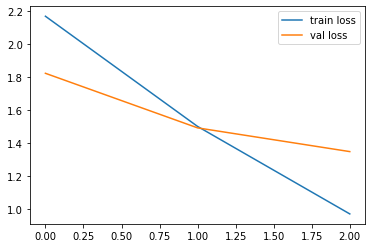

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_vgg')

In [ ]:
"""# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_resnet')"""

"# loss\nplt.plot(r1.history['loss'], label='train loss')\nplt.plot(r1.history['val_loss'], label='val loss')\nplt.legend()\nplt.show()\nplt.savefig('LossVal_loss_resnet')"

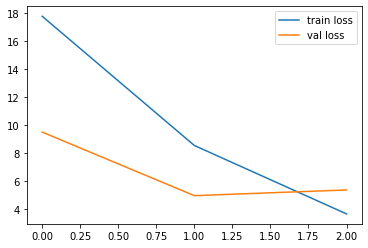

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_inception')

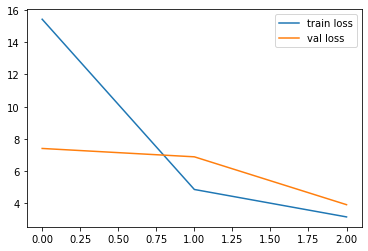

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r3.history['loss'], label='train loss')
plt.plot(r3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_densenet')

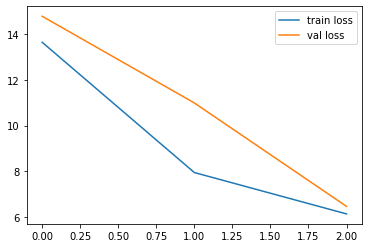

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r4.history['loss'], label='train loss')
plt.plot(r4.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_xception')

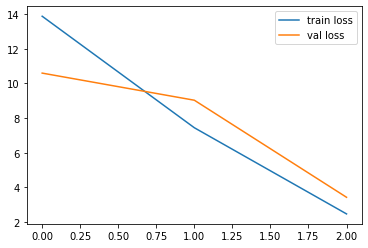

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r5.history['loss'], label='train loss')
plt.plot(r5.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_mobilenet')

ACCURACY PLOT

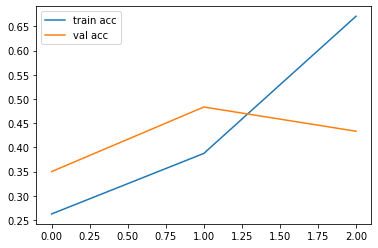

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_vgg')

In [ ]:
"""# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_resnet')"""

"# accuracies\nplt.plot(r1.history['accuracy'], label='train acc')\nplt.plot(r1.history['val_accuracy'], label='val acc')\nplt.legend()\nplt.show()\nplt.savefig('AccVal_acc_resnet')"

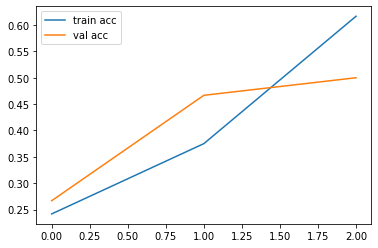

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_inception')

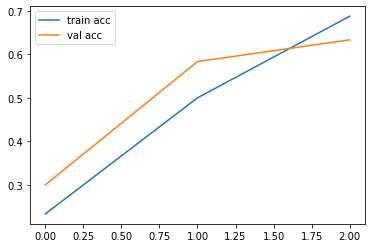

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r3.history['accuracy'], label='train acc')
plt.plot(r3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_densenet')

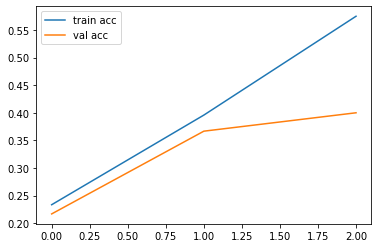

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r4.history['accuracy'], label='train acc')
plt.plot(r4.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_xception')

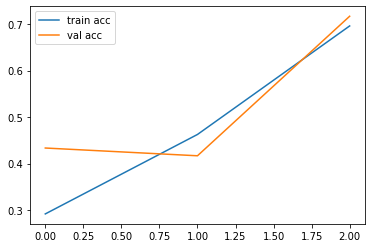

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r5.history['accuracy'], label='train acc')
plt.plot(r5.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_mobilenet')

In [ ]:
import tensorflow as tf

from keras.models import load_model

In [ ]:
model.save('vgg16_model.h5')

In [ ]:
# model1.save('resnet50_model.h5') #resnet50

In [ ]:
model2.save('inceptionV3_model.h5') #inceptionV3

In [ ]:
model3.save('densenet_model.h5') #densenet

In [ ]:
model4.save('xception_model.h5') #xception

In [ ]:
model5.save('mobilenet_model.h5') #mobilenet

In [ ]:
import tensorflow as tf
import cv2
from tensorflow import keras
from google.colab.patches import cv2_imshow

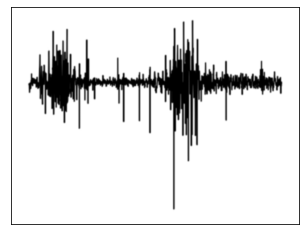

1/1 [==============================] - 0s 23ms/step
[[1.7517679e-18 2.6526381e-09 1.0000000e+00 3.6714277e-12 7.9903689e-20
  3.0367536e-10]]
Flexion


In [ ]:
#test_img = ''
#test_img_path = tf.keras.utils.get_file('Test Image', origin=test_img)
testimage = r'/content/drive/MyDrive/Hand/Validation_20/Validation_20/close/13.jpg'

img = cv2.imread(testimage,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = keras.preprocessing.image.load_img(
    testimage, target_size=(224, 224)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model5.predict(img_array)
#score = tf.nn.softmax(predictions[0])
predictions
print(predictions)
if(predictions[0][0]>0.8):
    print("Close")

if(predictions[0][1]>0.8):
    print("Extension")

if(predictions[0][2]>0.8):
    print("Flexion")

if(predictions[0][3]>0.8):
    print("Open")

if(predictions[0][4]>0.8):
    print("Pronation")

if(predictions[0][5]>0.8):
    print("Supination")

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 KB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import gradio as gr
from PIL import Image

In [ ]:
labels = ['Close','Extension','Flexion','Open','Pronation','Supination']

In [ ]:
def classify_image_with_vgg(im):
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((224, 224))
    arr = np.array(im).reshape((-1, 224, 224, 3))
    arr = tf.keras.applications.vgg16.preprocess_input(arr)
    prediction = model.predict(arr).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}


In [ ]:
""""def classify_image_with_resnet50(im):
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((224, 224))
    arr = np.array(im).reshape((-1, 224, 224, 3))
    arr = tf.keras.applications.vgg16.preprocess_input(arr)
    prediction = model1.predict(arr).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}"""

'"def classify_image_with_resnet50(im):\n    im = Image.fromarray(im.astype(\'uint8\'), \'RGB\')\n    im = im.resize((224, 224))\n    arr = np.array(im).reshape((-1, 224, 224, 3))\n    arr = tf.keras.applications.vgg16.preprocess_input(arr)\n    prediction = model1.predict(arr).flatten()\n    return {labels[i]: float(prediction[i]) for i in range(2)}'

In [ ]:
def classify_image_with_inception_net(im):
    # Resize the image to
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((224, 224))
    arr = np.array(im).reshape((-1, 224, 224, 3))
    arr = tf.keras.applications.inception_v3.preprocess_input(arr)
    prediction = model2.predict(arr).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}

In [ ]:
def classify_image_with_densenet(im):
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((224, 224))
    arr = np.array(im).reshape((-1, 224, 224, 3))
    arr = tf.keras.applications.densenet.preprocess_input(arr)
    prediction = model3.predict(arr).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}

In [ ]:
def classify_image_with_xception(im):
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((224, 224))
    arr = np.array(im).reshape((-1, 224, 224, 3))
    arr = tf.keras.applications.xception.preprocess_input(arr)
    prediction = model4.predict(arr).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}

In [ ]:
def classify_image_with_mobilenet(im):
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((224, 224))
    arr = np.array(im).reshape((-1, 224, 224, 3))
    arr = tf.keras.applications.mobilenet.preprocess_input(arr)
    prediction = model5.predict(arr).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}

In [ ]:
imagein = gr.inputs.Image(shape=(299, 299))
label = gr.outputs.Label(num_top_classes=2)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
gr.Interface(
    [classify_image_with_vgg,classify_image_with_inception_net,classify_image_with_xception,classify_image_with_mobilenet],
    imagein,
    label,
    title="VGG16 vs INCEPTIONV3 vs DENSENET vs XCEPTION vs MOBILENET",
    
    description="""LETS COMPARE BETWEEN THE MODELS""").launch(debug = True);

DeprecationWarning: ignored